In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, datetime

In [2]:
###automatically generate virtual time series data using random sampling

sample_size = 1000

#the number of abnormal points
num_abn_pt = 15
mu, sigma = 10, 2

#amplification coefficient
coef = 3
normal_data = np.random.normal(mu, sigma, sample_size)

#the CANDIDATES for abnormal points
#be cautious that this set of data points are not same as the set of abnormal points
abn_pt_cd = np.random.choice(range(sample_size), num_abn_pt, replace = None)

#amplify the value of abn_pd_cd
for i in abn_pt_cd:
    normal_data[i] += (normal_data[i] - mu) * coef

#using time record to identify non-repeatable datasets    
now = datetime.datetime.now()
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')

#series for dataset visualization
data_vis = pd.Series(normal_data, name = nowDatetime)

Text(0.5, 1.0, 'Virtual Time Series in 2019-05-11 20:18:59')

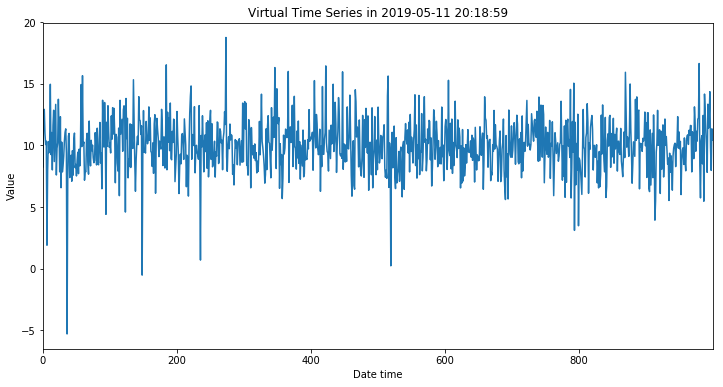

In [3]:
###dataset visualization
data_vis.plot(y='value', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Value')
plt.title("Virtual Time Series in %s" %data_vis.name)

In [4]:
###generate uniform interval datetime list
#start from 2000.01.01
init_dt = datetime.datetime(2000, 1, 1)
dt = []
for i in range(sample_size):
    #add every 1day to make next point. iterate 1000 times
    ith_dt = init_dt + i * datetime.timedelta(days=1)
    dt.append(ith_dt.isoformat())

In [18]:
###save as csv file to use in 'without_api.py', 'aws.py'
dice = {'timestamp': dt, 'value': normal_data}
df_csv = pd.DataFrame(dice)
# df_csv = pd.DataFrame(np.array([dt, normal_data]).T, columns = ['timestamp', 'value'])

df_csv.to_csv('%s.csv' %nowDatetime, index = False)

In [19]:
df_csv

,timestamp,value
0,2000-01-01T00:00:00,8.260354
1,2000-01-02T00:00:00,12.807938
2,2000-01-03T00:00:00,12.927103
3,2000-01-04T00:00:00,10.987465
4,2000-01-05T00:00:00,10.080948
5,2000-01-06T00:00:00,10.353689
6,2000-01-07T00:00:00,1.909988
7,2000-01-08T00:00:00,7.960847
8,2000-01-09T00:00:00,10.321299
9,2000-01-10T00:00:00,9.410050


In [41]:
###save as json file to use in 'azure.py', 'watson_discovery.py'
lists = []
for i in range(sample_size):
    lists.append({"timestamp": dt[i], "value": normal_data[i]})

#key 'granaluarity' is especially required in azure API
df_json = {'granularity': 'daily', 'series': lists}

with open('%s.json' %nowDatetime, 'w') as outfile:
    json.dump(df_json, outfile)